In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress
from pprint import pprint

#import censusdata

In [2]:
data_file = os.path.join("resources", "Decade Demographics.csv")
demog_df = pd.read_csv(data_file, thousands=',')
demog_df.head(10)

,Label (Grouping),United States!!Total!!Estimate,United States!!Foreign born; Entered 2010 or later!!Estimate,United States!!Foreign born; Entered 2000 to 2009!!Estimate,United States!!Foreign born; Entered before 2000!!Estimate
0,Foreign-born population,"44,932,901","11,142,149","11,035,400","22,755,352"
1,CITIZENSHIP,NaN,NaN,NaN,NaN
2,Naturalized citizen,51.6%,13.7%,47.6%,72.1%
3,Not a citizen,48.4%,86.3%,52.4%,27.9%
4,WORLD REGION OF BIRTH OF FOREIGN BORN,NaN,NaN,NaN,NaN
5,Foreign-born population excluding popu...,"44,932,799","11,142,149","11,035,400","22,755,250"
6,Europe,10.4%,8.0%,7.8%,12.8%
7,Asia,31.4%,38.8%,29.3%,28.8%
8,Africa,5.5%,9.1%,6.7%,3.2%
9,Oceania,0.7%,0.9%,0.7%,0.5%


In [3]:
#Format data frame, "or later" = 2020
demog_df = demog_df.dropna()
demog_df = demog_df.rename(columns = {"United States!!Total!!Estimate": "United States Total",
                                    "United States!!Foreign born; Entered 2010 or later!!Estimate": "Entered 2010 or later",
                                   "United States!!Foreign born; Entered 2000 to 2009!!Estimate": "Entered 2000 to 2009",
                                   "United States!!Foreign born; Entered before 2000!!Estimate": "Entered before 2000"})
demog_df = demog_df.reset_index(drop = True)

demog_df.head(50)

,Label (Grouping),United States Total,Entered 2010 or later,Entered 2000 to 2009,Entered before 2000
0,Foreign-born population,"44,932,901","11,142,149","11,035,400","22,755,352"
1,Naturalized citizen,51.6%,13.7%,47.6%,72.1%
2,Not a citizen,48.4%,86.3%,52.4%,27.9%
3,Foreign-born population excluding popu...,"44,932,799","11,142,149","11,035,400","22,755,250"
4,Europe,10.4%,8.0%,7.8%,12.8%
5,Asia,31.4%,38.8%,29.3%,28.8%
6,Africa,5.5%,9.1%,6.7%,3.2%
7,Oceania,0.7%,0.9%,0.7%,0.5%
8,Latin America,50.3%,41.5%,54.3%,52.6%
9,Northern America,1.8%,1.7%,1.2%,2.1%


In [4]:
#Get total population numbers
total_pop = demog_df.iloc[:1]

#Format data frame
total_pop = total_pop.set_index("Label (Grouping)")
total_pop = total_pop.apply(lambda x: x.str.replace(",", "").astype(int))

#Display
total_pop

,United States Total,Entered 2010 or later,Entered 2000 to 2009,Entered before 2000
Label (Grouping),,,,
Foreign-born population,44932901,11142149,11035400,22755352


In [73]:
#Get age information
immigrant_age = demog_df.iloc[12:21, :]
median_age = demog_df.iloc[22:23]

#Set index to age groupings
immigrant_age = immigrant_age.set_index("Label (Grouping)")
median_age = median_age.set_index("Label (Grouping)")

#Turn (X) to 0 (need to replace with NaN later?)
immigrant_age = immigrant_age.replace("(X)", "00")

#Remove Percentage Signs, divide by 100
for i in range (0, 4):
    
    #Remove "%"
    immigrant_age.iloc[:, i] = list(map(lambda x: x[:-1], immigrant_age.iloc[:, i].values))
    
    #Convert to float
    immigrant_age.iloc[:, i] = list(map(lambda x: float(x), immigrant_age.iloc[:, i].values))
    
    #Divide by 100
    immigrant_age.iloc[:, i] = list(map(lambda x: x / 100, immigrant_age.iloc[:, i].values))

#Convert to actual population numbers, round to the nearest whole person
imm_age_numbers = round(immigrant_age.multiply(total_pop.iloc[0], axis='columns')).astype(int)

imm_age_numbers

,United States Total,Entered 2010 or later,Entered 2000 to 2009,Entered before 2000
Label (Grouping),,,,
Under 5 years,314530,300838,0,0
5 to 17 years,2246645,1715891,529699,0
18 to 24 years,2830773,1493048,1070434,273064
25 to 44 years,16400509,5403942,5837727,5165465
45 to 54 years,8806849,1091931,2019478,5666083
55 to 64 years,6829801,590534,938009,5301997
65 to 74 years,4358491,356549,408310,3595346
75 to 84 years,2246645,144848,187602,1934205
85 years and over,898658,33426,55177,796437


In [71]:
#imm_age_numbers = imm_age_numbers.drop(["United States Total"], axis=1)
imm_age_transp = imm_age_numbers.transpose()

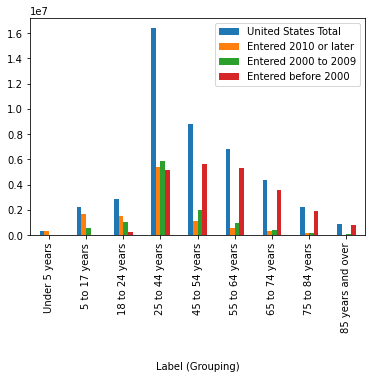

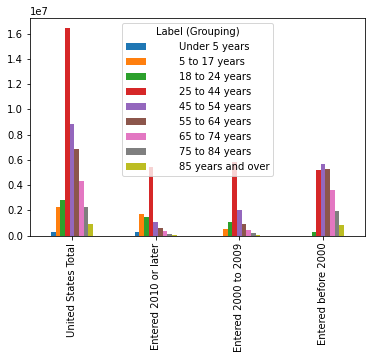

In [72]:
imm_age_numbers.plot.bar();

imm_age_transp.plot.bar();

In [8]:
#Get gender information
immigrant_gender = demog_df.iloc[10:12, :]


#Set index to gender groupings
immigrant_gender = immigrant_gender.set_index("Label (Grouping)")

#Remove Percentage Signs, divide by 100
for i in range (0, 4):
    
    #Remove "%"
    immigrant_gender.iloc[:, i] = list(map(lambda x: x[:-1], immigrant_gender.iloc[:, i].values))
    
    #Convert to float
    immigrant_gender.iloc[:, i] = list(map(lambda x: float(x), immigrant_gender.iloc[:, i].values))
    
    #Divide by 100
    immigrant_gender.iloc[:, i] = list(map(lambda x: x / 100, immigrant_gender.iloc[:, i].values))

#Convert to actual population numbers, round to the nearest whole person
imm_gender_numbers = round(immigrant_gender.multiply(total_pop.iloc[0], axis='columns')).astype(int)

imm_gender_numbers

,United States Total,Entered 2010 or later,Entered 2000 to 2009,Entered before 2000
Label (Grouping),,,,
Male,21657658,5470795,5285957,10899814
Female,23275243,5671354,5749443,11855538


In [9]:
#Dropping the total column
imm_gender_numbers = imm_gender_numbers.drop(["United States Total"], axis=1)

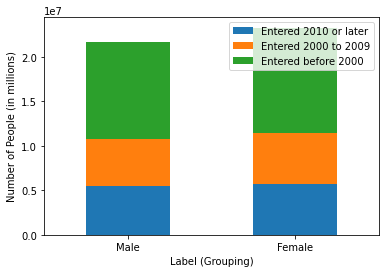

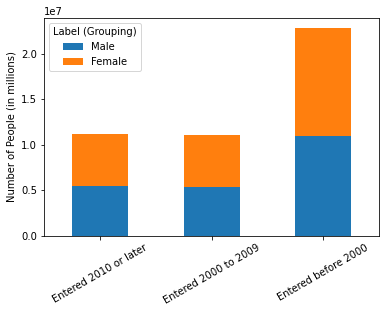

In [68]:
imm_gender_numbers.index = imm_gender_numbers.index.str.strip()

imm_gender_transp = imm_gender_numbers.transpose()

ylabel = "Number of People (in millions)"
title = ""
titleT = ""
imm_gender_numbers.plot.bar(stacked=True, ylabel = ylabel, rot = 0);

imm_gender_transp.plot.bar(stacked=True, ylabel = ylabel, rot = 30);

In [11]:
#Get continents information
immigrant_continents = demog_df.iloc[4:9, :]


#Set index to continents groupings
immigrant_continents = immigrant_continents.set_index("Label (Grouping)")


#Turn (X) to 0 (need to replace with NaN later?)
#immigrant_age = immigrant_age.replace("(X)", "00")

#Remove Percentage Signs, divide by 100
for i in range (0, 4):
    
    #Remove "%"
    immigrant_continents.iloc[:, i] = list(map(lambda x: x[:-1], immigrant_continents.iloc[:, i].values))
    
    #Convert to float
    immigrant_continents.iloc[:, i] = list(map(lambda x: float(x), immigrant_continents.iloc[:, i].values))
    
    #Divide by 100
    immigrant_continents.iloc[:, i] = list(map(lambda x: x / 100, immigrant_continents.iloc[:, i].values))

#Convert to actual population numbers, round to the nearest whole person
imm_continents_numbers = round(immigrant_continents.multiply(total_pop.iloc[0], axis='columns')).astype(int)
imm_continents_numbers

,United States Total,Entered 2010 or later,Entered 2000 to 2009,Entered before 2000
Label (Grouping),,,,
Europe,4673022,891372,860761,2912685
Asia,14108931,4323154,3233372,6553541
Africa,2471310,1013936,739372,728171
Oceania,314530,100279,77248,113777
Latin America,22601249,4623992,5992222,11969315


In [12]:
#Dropping the total column
imm_continents_numbers = imm_continents_numbers.drop(["United States Total"], axis=1)

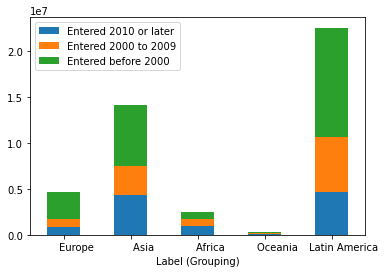

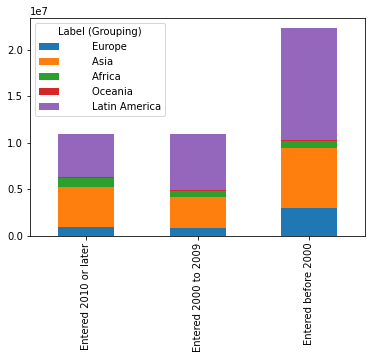

In [69]:
imm_continents_transp = imm_continents_numbers.transpose()

title = ""
ylabel = ""
imm_continents_numbers.plot.bar(stacked=True, rot = 0);

imm_continents_transp.plot.bar(stacked=True);

In [14]:
#Get race information
immigrant_race = demog_df.iloc[[22,29], :]


#Set index to race groupings
immigrant_race = immigrant_race.set_index("Label (Grouping)")


#Remove Percentage Signs, divide by 100
for i in range (0, 4):
    
    #Remove "%"
    immigrant_race.iloc[:, i] = list(map(lambda x: x[:-1], immigrant_race.iloc[:, i].values))
    
    #Convert to float
    immigrant_race.iloc[:, i] = list(map(lambda x: float(x), immigrant_race.iloc[:, i].values))
    
    #Divide by 100
    immigrant_race.iloc[:, i] = list(map(lambda x: x / 100, immigrant_race.iloc[:, i].values))

#Convert to actual population numbers, round to the nearest whole person
imm_race_numbers = round(immigrant_race.multiply(total_pop.iloc[0], axis='columns')).astype(int)
imm_race_numbers

,United States Total,Entered 2010 or later,Entered 2000 to 2009,Entered before 2000
Label (Grouping),,,,
One race,43854511,10819027,10803657,22254734
Two or more races,1078390,323122,231743,500618


In [15]:
#Dropping the total column
imm_race_numbers = imm_race_numbers.drop(["United States Total"], axis=1)

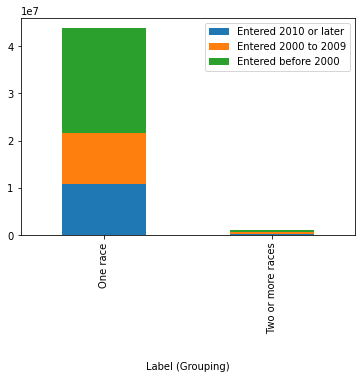

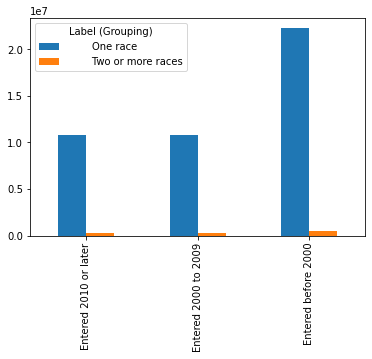

In [16]:
imm_race_transp = imm_race_numbers.transpose()

imm_race_numbers.plot.bar(stacked=True);

imm_race_transp.plot.bar();

In [17]:
#Get one race information
immigrant_one_race = demog_df.iloc[23:28, :]


#Set index to one race groupings
immigrant_one_race = immigrant_one_race.set_index("Label (Grouping)")
immigrant_one_race



#Remove Percentage Signs, divide by 100
for i in range (0, 4):
    
    #Remove "%"
    immigrant_one_race.iloc[:, i] = list(map(lambda x: x[:-1], immigrant_one_race.iloc[:, i].values))
    
    #Convert to float
    immigrant_one_race.iloc[:, i] = list(map(lambda x: float(x), immigrant_one_race.iloc[:, i].values))
    
    #Divide by 100
    immigrant_one_race.iloc[:, i] = list(map(lambda x: x / 100, immigrant_one_race.iloc[:, i].values))

#Convert to actual population numbers, round to the nearest whole person
imm_one_race_numbers = round(immigrant_one_race.multiply(total_pop.iloc[0], axis='columns')).astype(int)
imm_one_race_numbers

,United States Total,Entered 2010 or later,Entered 2000 to 2009,Entered before 2000
Label (Grouping),,,,
White,20309671,4378865,4855576,11104612
Black or African American,4358491,1348200,1158717,1820428
American Indian and Alaska Native,179732,33426,44142,91021
Asian,12221749,3621198,2847133,5757104
Native Hawaiian and Other Pacific Islander,179732,55711,44142,68266


In [18]:
#Dropping the total column
imm_one_race_numbers = imm_one_race_numbers.drop(["United States Total"], axis=1)

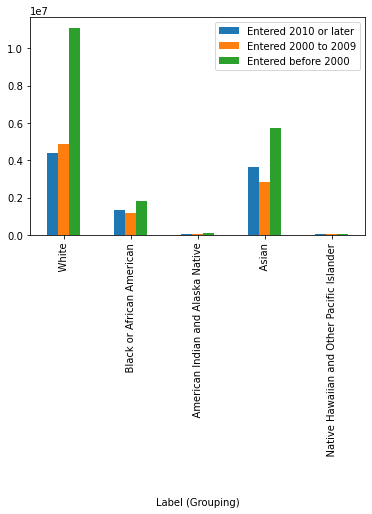

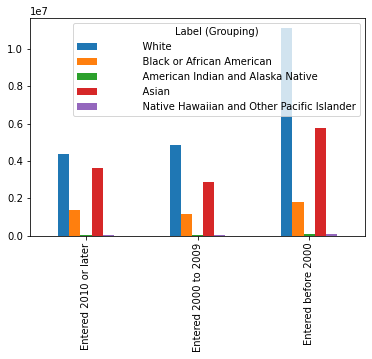

In [19]:
imm_one_race_transp = imm_one_race_numbers.transpose()

imm_one_race_numbers.plot.bar();

imm_one_race_transp.plot.bar();

In [20]:
#Get 2+ race information
immigrant_more_than_one_race = demog_df.iloc[30:32, :]


#Set index to 2+ race groupings
immigrant_more_than_one_race = immigrant_more_than_one_race.set_index("Label (Grouping)")


#Remove Percentage Signs, divide by 100
for i in range (0, 4):
    
    #Remove "%"
    immigrant_more_than_one_race.iloc[:, i] = list(map(lambda x: x[:-1], immigrant_more_than_one_race.iloc[:, i].values))
    
    #Convert to float
    immigrant_more_than_one_race.iloc[:, i] = list(map(lambda x: float(x), immigrant_more_than_one_race.iloc[:, i].values))
    
    #Divide by 100
    immigrant_more_than_one_race.iloc[:, i] = list(map(lambda x: x / 100, immigrant_more_than_one_race.iloc[:, i].values))

#Convert to actual population numbers, round to the nearest whole person
imm_more_than_one_race_numbers = round(immigrant_more_than_one_race.multiply(total_pop.iloc[0], axis='columns')).astype(int)
imm_more_than_one_race_numbers

,United States Total,Entered 2010 or later,Entered 2000 to 2009,Entered before 2000
Label (Grouping),,,,
Hispanic or Latino origin (of any race),19860342,3988889,5352169,10512973
"White alone, not Hispanic or Latino",7818325,1883023,1533921,4391783


In [21]:
#Dropping the total column
imm_more_than_one_race_numbers = imm_more_than_one_race_numbers.drop(["United States Total"], axis=1)

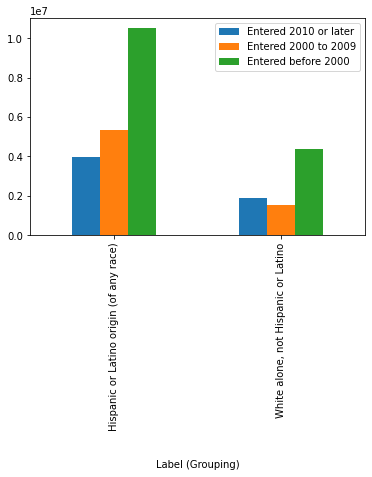

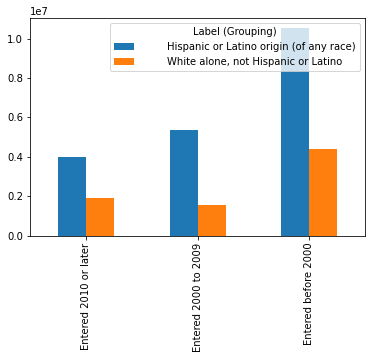

In [22]:
imm_more_than_one_race_transp = imm_more_than_one_race_numbers.transpose()

imm_more_than_one_race_numbers.plot.bar();

imm_more_than_one_race_transp.plot.bar();

In [23]:
#Get Marital Status information
immigrant_marital_status = demog_df.iloc[37:41, :]


#Set index to Marital Status groupings
immigrant_marital_status = immigrant_marital_status.set_index("Label (Grouping)")

#Remove Percentage Signs, divide by 100
for i in range (0, 4):
    
    #Remove "%"
    immigrant_marital_status.iloc[:, i] = list(map(lambda x: x[:-1], immigrant_marital_status.iloc[:, i].values))
    
    #Convert to float
    immigrant_marital_status.iloc[:, i] = list(map(lambda x: float(x), immigrant_marital_status.iloc[:, i].values))
    
    #Divide by 100
    immigrant_marital_status.iloc[:, i] = list(map(lambda x: x / 100, immigrant_marital_status.iloc[:, i].values))



#Get total marital status number
total_marital_pop = demog_df.loc[[36],:]

#Format data frame
total_marital_pop = total_marital_pop.set_index("Label (Grouping)")
total_marital_pop = total_marital_pop.apply(lambda x: x.str.replace(",", "").astype(int))



#Convert to actual population numbers, round to the nearest whole person
imm_marital_status_numbers = round(immigrant_marital_status.multiply(total_marital_pop.iloc[0], axis='columns')).astype(int)
imm_marital_status_numbers

,United States Total,Entered 2010 or later,Entered 2000 to 2009,Entered before 2000
Label (Grouping),,,,
Never married,10086476,3488317,3234679,3345037
"Now married, except separated",25905864,5232476,6274629,14404138
Divorced or separated,4827715,571855,1038559,3208505
Widowed,2327648,238273,270458,1797673


In [24]:
#Dropping the total column
imm_marital_status_numbers = imm_marital_status_numbers.drop(["United States Total"], axis=1)

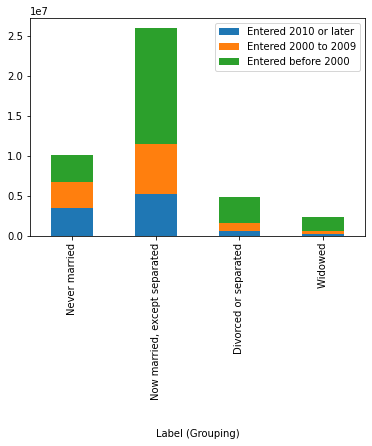

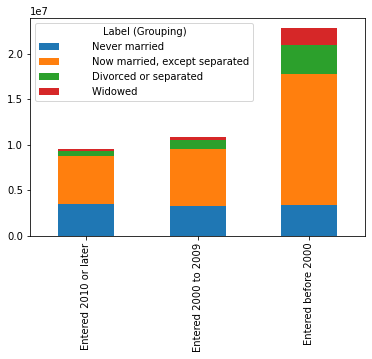

In [25]:
imm_marital_status_transp = imm_marital_status_numbers.transpose()

imm_marital_status_numbers.plot.bar(stacked = True);

imm_marital_status_transp.plot.bar(stacked = True);

In [26]:
#Get total population numbers for education
total_edu_pop = demog_df.loc[[41,46],:]

#Format data frame
total_edu_pop = total_edu_pop.set_index("Label (Grouping)")
total_edu_pop = total_edu_pop.apply(lambda x: x.str.replace(",", "").astype(int))

#Display
total_edu_pop

,United States Total,Entered 2010 or later,Entered 2000 to 2009,Entered before 2000
Label (Grouping),,,,
Population 3 years and over enrolled in school,5510985,3201220,1544527,765238
Population 25 years and over,39553892,7630018,9442686,22481188


In [27]:
total_edu_pop.sum()-total_pop.iloc[0]

United States Total      131976
Entered 2010 or later   -310911
Entered 2000 to 2009     -48187
Entered before 2000      491074
dtype: int64

In [28]:
#Get age 3+ in school information
immigrant_in_school = demog_df.iloc[42:46, :]


#Set index to 3+ in school groupings
immigrant_in_school = immigrant_in_school.set_index("Label (Grouping)")
immigrant_in_school.head()

#Remove Percentage Signs, divide by 100
for i in range (0, 4):
    
    #Remove "%"
    immigrant_in_school.iloc[:, i] = list(map(lambda x: x[:-1], immigrant_in_school.iloc[:, i].values))
    
    #Convert to float
    immigrant_in_school.iloc[:, i] = list(map(lambda x: float(x), immigrant_in_school.iloc[:, i].values))
    
    #Divide by 100
    immigrant_in_school.iloc[:, i] = list(map(lambda x: x / 100, immigrant_in_school.iloc[:, i].values))

#Convert to actual population numbers, round to the nearest whole person
imm_in_school_numbers = round(immigrant_in_school.multiply(total_edu_pop.iloc[0], axis='columns')).astype(int)
imm_in_school_numbers

,United States Total,Entered 2010 or later,Entered 2000 to 2009,Entered before 2000
Label (Grouping),,,,
"Nursery school, preschool",99198,99238,0,0
Elementary school (grades K-8),1355702,1181250,169898,7652
High school (grades 9-12),1069131,569817,444824,55097
College or graduate school,2981443,1350915,929805,702488


In [29]:
#Dropping the total column
imm_in_school_numbers = imm_in_school_numbers.drop(["United States Total"], axis=1)

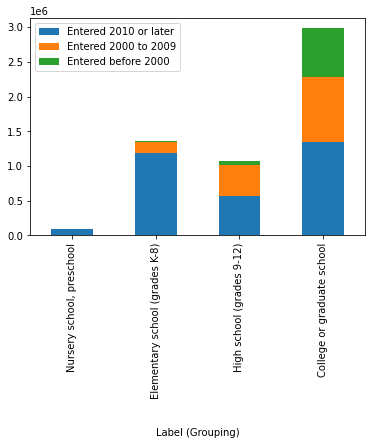

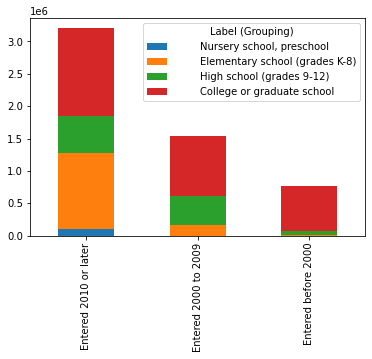

In [30]:
imm_in_school_transp = imm_in_school_numbers.transpose()

imm_in_school_numbers.plot.bar(stacked = True);

imm_in_school_transp.plot.bar(stacked = True);

In [31]:
#Get 25+ education information
immigrant_edu_plus25 = demog_df.iloc[47:50, :]


#Set index to 25+ education groupings
immigrant_edu_plus25 = immigrant_edu_plus25.set_index("Label (Grouping)")


#Remove Percentage Signs, divide by 100
for i in range (0, 4):
    
    #Remove "%"
    immigrant_edu_plus25.iloc[:, i] = list(map(lambda x: x[:-1], immigrant_edu_plus25.iloc[:, i].values))
    
    #Convert to float
    immigrant_edu_plus25.iloc[:, i] = list(map(lambda x: float(x), immigrant_edu_plus25.iloc[:, i].values))
    
    #Divide by 100
    immigrant_edu_plus25.iloc[:, i] = list(map(lambda x: x / 100, immigrant_edu_plus25.iloc[:, i].values))

#Convert to actual population numbers, round to the nearest whole person
imm_edu_plus25_numbers = round(immigrant_edu_plus25.multiply(total_edu_pop.iloc[0], axis='columns')).astype(int)
imm_edu_plus25_numbers

,United States Total,Entered 2010 or later,Entered 2000 to 2009,Entered before 2000
Label (Grouping),,,,
Less than high school graduate,1449389,617835,424745,215797
High school graduate (includes equivalency),1228950,640244,355241,174474
Some college or associate's degree,1030554,489787,267203,156109


In [32]:
#Dropping the total column
imm_edu_plus25_numbers = imm_edu_plus25_numbers.drop(["United States Total"], axis=1)

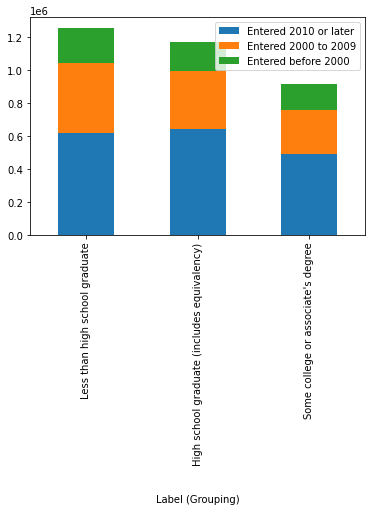

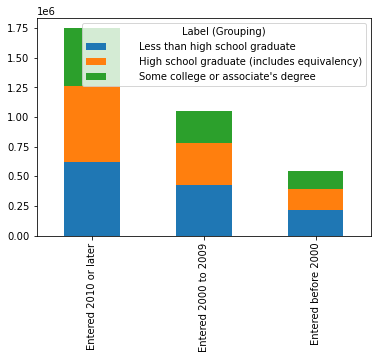

In [33]:
imm_edu_plus25_transp = imm_edu_plus25_numbers.transpose()

imm_edu_plus25_numbers.plot.bar(stacked = True);

imm_edu_plus25_transp.plot.bar(stacked = True);

In [34]:
imm_marital_status_numbers

,Entered 2010 or later,Entered 2000 to 2009,Entered before 2000
Label (Grouping),,,
Never married,3488317,3234679,3345037
"Now married, except separated",5232476,6274629,14404138
Divorced or separated,571855,1038559,3208505
Widowed,238273,270458,1797673


In [35]:
imm_gender_numbers

,Entered 2010 or later,Entered 2000 to 2009,Entered before 2000
Label (Grouping),,,
Male,5470795,5285957,10899814
Female,5671354,5749443,11855538
